In [1]:
import awkward as ak
import uproot
from glob import glob
import numpy as np

import hist as hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd
import scipy.stats
plt.style.use(hep.style.ROOT)
import matplotlib.colors as mcolors

from scipy.optimize import curve_fit
import os


In [2]:
def calmass(beam,mass):
    simname = 'data/iron/'+ beam + 'beam' + mass + 'mass_hepmc.root'
    truth = uproot.open(simname)["Events"]
    hits = ak.zip({"detID": truth["hit_detID"].array(),
                   "x": truth["hit_truthx"].array(),
                   "y": truth["hit_truthy"].array(),
                   "z": truth["hit_truthz"].array(),
                   "px": truth["hit_truthpx"].array(),
                   "py": truth["hit_truthpy"].array(),
                   "pz": truth["hit_truthpz"].array(),
                  }, depth_limit=1)

    # adding simulated muon 1&2
    ge00 = ak.to_numpy(truth["ge"].array()[:,0])
    ge01 = ak.to_numpy(truth["ge"].array()[:,1])

    gpx00 = ak.to_numpy(truth["gpx"].array()[:,0])
    gpx01 = ak.to_numpy(truth["gpx"].array()[:,1])

    gpy00 = ak.to_numpy(truth["gpy"].array()[:,0])
    gpy01 = ak.to_numpy(truth["gpy"].array()[:,1])

    gpz00 = ak.to_numpy(truth["gpz"].array()[:,0])
    gpz01 = ak.to_numpy(truth["gpz"].array()[:,1])


    gpx=[]
    gpy=[]
    gpz=[]
    ge=[]

    for i in range(int(len(ge00))):
        ge.append(ge00[i] + ge01[i])
        gpx.append(gpx00[i] + gpx01[i])
        gpy.append(gpy00[i] + gpy01[i])
        gpz.append(gpz00[i] + gpz01[i])

    # print('gpx: \n',gpx[0:5],'\ndpx: \n',dpx[0:5])

    calmass = []
    vc = 1
    for i in range(len(ge)):
        cmass = (ge[i]**2/vc**4 - (gpx[i]**2+gpy[i]**2+gpz[i]**2)/vc**2)
        calmass.append(np.sqrt(cmass))
    # print('calmass: \n',calmass)


    # fit a normdistribution
    x=calmass
    mu =np.mean(x)
    sigma =np.std(x) 


    num_bins = 50
    n, bins, patches = plt.hist(x, num_bins,density=1, histtype='step',label=r"$p_Z^{\mu}=%s$ GeV"%beam) 
    y = scipy.stats.norm.pdf(bins, mu, sigma,)
    plt.plot(bins, y, 'r--',label='$\mu=$'+ str(round(mu,5))+'\n$\sigma=$'+ str(round(sigma,5)))
    plt.xlabel('m') 
    plt.ylabel('A.U.') 
    title = r"$\mu^- + (S_{%s GeV} \rightarrow \mu^+\mu^-)$"%mass
    plt.legend()
    plt.title(title)
#     plt.subplots_adjust(left=0.15)

In [3]:
def calmass2(beam,mass):
    simname = 'data/iron/'+ beam + 'beam' + mass + 'mass_hepmc.root'
    truth = uproot.open(simname)["Events"]
    hits = ak.zip({"detID": truth["hit_detID"].array(),
                   "x": truth["hit_truthx"].array(),
                   "y": truth["hit_truthy"].array(),
                   "z": truth["hit_truthz"].array(),
                   "px": truth["hit_truthpx"].array(),
                   "py": truth["hit_truthpy"].array(),
                   "pz": truth["hit_truthpz"].array(),
                  }, depth_limit=1)

    # adding simulated muon 1&2
    ge00 = ak.to_numpy(truth["ge"].array()[:,0])
    ge01 = ak.to_numpy(truth["ge"].array()[:,1])

    gpx00 = ak.to_numpy(truth["gpx"].array()[:,0])
    gpx01 = ak.to_numpy(truth["gpx"].array()[:,1])

    gpy00 = ak.to_numpy(truth["gpy"].array()[:,0])
    gpy01 = ak.to_numpy(truth["gpy"].array()[:,1])

    gpz00 = ak.to_numpy(truth["gpz"].array()[:,0])
    gpz01 = ak.to_numpy(truth["gpz"].array()[:,1])


    gpx=[]
    gpy=[]
    gpz=[]
    ge=[]

    for i in range(int(len(ge00))):
        ge.append(ge00[i] + ge01[i])
        gpx.append(gpx00[i] + gpx01[i])
        gpy.append(gpy00[i] + gpy01[i])
        gpz.append(gpz00[i] + gpz01[i])

    # print('gpx: \n',gpx[0:5],'\ndpx: \n',dpx[0:5])

    calmass = []
    vc = 1

    Tmass = []
    remass = []
    resmass = []
    for i in range(len(truth["truthdimuon_mass"].array())):
        if len(truth["dimuon_mass"].array()[i]) == 1:
            cmass = (ge[i]**2/vc**4 - (gpx[i]**2+gpy[i]**2+gpz[i]**2)/vc**2)
            calmass.append(np.sqrt(cmass))
            Tmass.append(truth["truthdimuon_mass"].array()[i][0])
            remass.append(truth["dimuon_mass"].array()[i][0])
            resmass.append(truth["dimuon_mass"].array()[i][0]-truth["truthdimuon_mass"].array()[i][0])
    num_bins2 = 50
    plt.hist(Tmass, num_bins2,density=None, histtype='step',label=r"truth_$mass=%s$ GeV"%beam,)
    n2, bins2, patches2 = plt.hist(remass, num_bins2,density=None, histtype='step',label=r"rec_$mass=%s$ GeV"%beam,)
    n0, bins0, patches0 = plt.hist(resmass, num_bins2,density=None, histtype='step',label=r"res_$mass=%s$ GeV"%beam,)

#     x2=mass
#     mu2 =np.mean(x2)
#     sigma2 =np.std(x2) 
#     y2 = scipy.stats.norm.pdf(bins2, mu2, sigma2,)
#     plt.plot(bins2, y2, 'r--',label='$\mu=$'+ str(round(mu,5))+'\n$\sigma=$'+ str(round(sigma,5)))
    
    
    
    
    # fit a normdistribution
    x=calmass
    mu =np.mean(x)
    sigma =np.std(x) 
    
    num_bins = 20
#     n, bins, patches = plt.hist(x, num_bins,density=None, histtype='step',label=r"$dimuon mass=%s$ GeV"%beam,) 
#     y = scipy.stats.norm.pdf(bins, mu, sigma,)
#     plt.plot(bins, y, 'r--',label='$\mu=$'+ str(round(mu,5))+'\n$\sigma=$'+ str(round(sigma,5)))
    plt.xlabel('M/GeV') 
    plt.ylabel('A.U.') 
    title = r"$\mu^- + (S_{%s GeV} \rightarrow \mu^+\mu^-)$"%mass
    plt.legend()
    plt.title(title)
    return Tmass, remass, calmass, resmass
#     plt.subplots_adjust(left=0.15)

In [4]:
# get outliers for data
def get_outer_data(data_list):
    df = pd.DataFrame(data_list, columns=['value'])
    df = df.iloc[:, 0]
    # Calculate the lower and upper quartiles
    Q1 = df.quantile(q=0.25)
    Q3 = df.quantile(q=0.75)

    low_whisker = Q1 - 1.5 * (Q3 - Q1)
    up_whisker = Q3 + 1.5 * (Q3 - Q1)

    # get puter data
    kk = df[(df > up_whisker) | (df < low_whisker)]
    data0 = pd.DataFrame({'id': kk.index, 'outlier': kk})
    return data0

def plot_outer_data(result):
    mean, std = result.mean(), result.std(ddof=1) 
    mean = round(mean, 3)
    std = round(std, 3)
    print(mean, std)

    conf_intveral = stats.norm.interval(0.9, loc=mean, scale=std)  # 90%possibility
#     print('confidence interval:', conf_intveral)

    x = np.arange(0, len(result), 1)

    # get outer data
    outer = get_outer_data(result)
#     print(outer, type(outer))
    x1 = outer.iloc[:, 0]
    y1 = outer.iloc[:, 1]
#     plt.scatter(x, result, marker='.', color='g') 
#     plt.scatter(x1, y1, marker='x', color='r')  # plot outer data
#     plt.plot([0, len(result)], [conf_intveral[0], conf_intveral[0]])
#     plt.plot([0, len(result)], [conf_intveral[1], conf_intveral[1]])
#     plt.show()
    return outer


def plot_reduce_norm(data, station):
    result=np.array(data)
    step = 0
    outer = []
    while len(outer)>10 or step == 0:
        step+=1
        outer= plot_outer_data(result)
        outid=[]
        reducedata=[]
        for i in range(len(outer)):
            outid.append(int(outer.iloc[i].id))
        for i in range(len(result)):
            if i in outid:
                pass
            else:
                reducedata.append(result[i])
        result=np.array(reducedata)

    x = result
    mu =np.mean(x)
    sigma =np.std(x) 
    mu = round(mu, 3)
    sigma = round(sigma, 3)

    plt.figure(figsize=(8,5))
    num_bins = 50
    n, bins, patches = plt.hist(x, num_bins,density=1, histtype='step')
    y = scipy.stats.norm.pdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel('residual_mass')
    plt.ylabel('A.U.')
    title = r'$\mu=$'+ str(mu)+'$\sigma=$'+str(sigma)
    plt.title(title)
    plt.subplots_adjust(left=0.15)
    plt.show()
    
    
def gaussian_fit(resmass, mean):
    residual = resmass
    plot_bins = 50
    plot_range = (-0.5, 1)
    p_guess=[0.05, 0, 0.1],
    residual_label = r'Reco $m_{dimuon}$ - Truth $m_{dimuon}[GeV]$'
    #Plot and fit
    plt.figure(figsize=(8,5))
    plt.hist(residual,
         bins = plot_bins,
         range = plot_range,
         density = True)

    ## Gaussian fit
    ## Fit directly on the histogram
    def fit_function(x, A, mu, sig):
        return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

    bins = np.linspace(plot_range[0], plot_range[1], plot_bins+1)
    binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

    data_entries, _ = np.histogram(residual, bins=bins,
                                   range = plot_range,
                                   density = True)

    mask = data_entries!=0
    #Fit the function to the histogram data.
    popt, pcov = curve_fit(fit_function,
                           xdata=binscenters[mask],
                           ydata=data_entries[mask],
                           sigma = np.sqrt(data_entries[mask]),
                           absolute_sigma = False,
                           p0=p_guess)

    #Error for parameter estimations
    perr = np.sqrt(np.diag(pcov))
    print("Error for parameter esimations: ", perr)

    std_fit = np.abs(popt[2])
    mean_fit = popt[1]

    print("Standard deviation (fit) is", std_fit)
    print("Mean (fit) is", mean_fit)

    #Plot fitted gaussian
    plt.plot(bins,
             fit_function(bins, *popt),
             "r-",
             linewidth=4,
             label='Best fit')

    plt.plot([],[], 'none', label=r'$\mu=%.2f$ [GeV]'%popt[1])
    plt.plot([],[], 'none', label=r'$\sigma=%.4f$ [GeV]'%abs(popt[2]))
    plt.plot([],[], 'none', label=r'$<m>=%.2f$ [GeV]'%mean)
    plt.plot([],[], 'none', label=r'$\sigma/<m>=%.4f$'%(abs(popt[2])/mean))
#     plt.plot([],[], 'none', label=r'$<m>=%.2f$ [GeV]'%mean)
#     plt.plot([],[], 'none', label=r'$\sigma/<m>=%.4f$ [%%]'%(abs(popt[2])/mean))

    #Label the axes
    plt.xlabel(residual_label)
    plt.ylabel('A.U.')
    plt.legend()

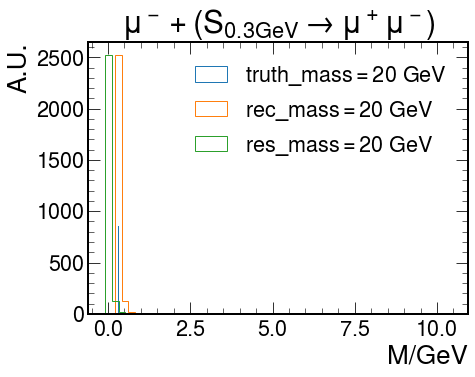

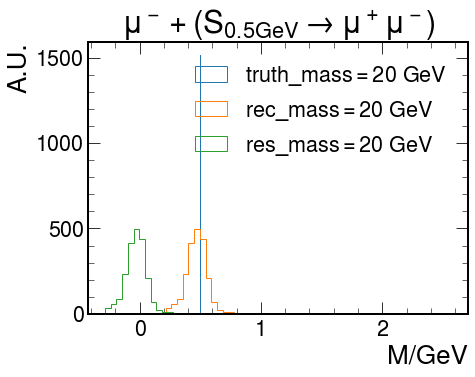

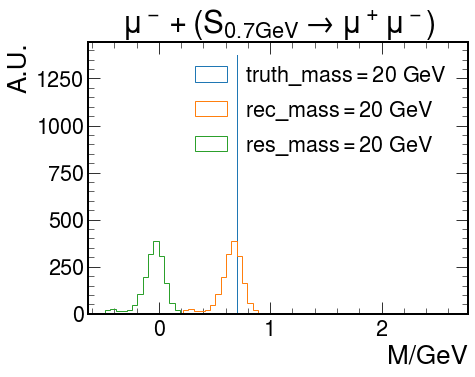

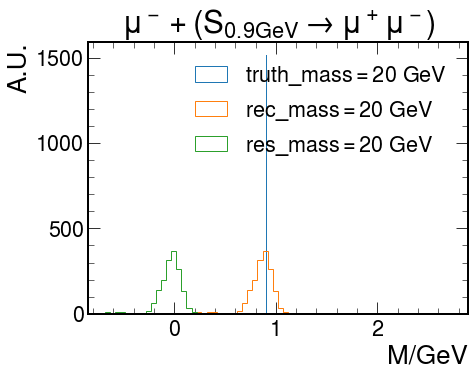

In [6]:
# beam_toloop = ["15","20"]
# mass_toloop = ["0.3","0.5","0.9","0.7"]
# detmass_list = []
# for mass in mass_toloop:
#     i=1
#     plt.figure(figsize=(20,10))
#     for beam in beam_toloop:
#         plt.subplot(1,2,i);i+=1
#         Tmass, remass, calmass, detmass = calmass2(beam, mass)
#         detmass_list.append(detmass)
#     plt.show()

beam_toloop = ["20"]
mass_toloop = ["0.3","0.5","0.7","0.9"]
resmass_list = []
recmass_list = []
for mass in mass_toloop:
    i=1
    plt.figure(figsize=(15,5))
    for beam in beam_toloop:
        plt.subplot(1,2,i);i+=1
        Tmass, remass, calmass, resmass = calmass2(beam, mass)
        resmass_list.append(resmass)
        recmass_list.append(remass)
    plt.show()

In [20]:
len(recmass_list[0])

2693

nan
Error for parameter esimations:  [0.48965125 0.00249878 0.00208927]
Standard deviation (fit) is 0.04891125184644392
Mean (fit) is -0.000518687402152185
0.4782073927867525
Error for parameter esimations:  [0.25255654 0.00305313 0.0024566 ]
Standard deviation (fit) is 0.07661413449006389
Mean (fit) is -0.031148652267425945
0.6609673121926823
Error for parameter esimations:  [0.25113811 0.00388039 0.00290835]
Standard deviation (fit) is 0.0845868426166009
Mean (fit) is -0.03660375486561307
nan
Error for parameter esimations:  [0.18796471 0.00305724 0.00223277]
Standard deviation (fit) is 0.08791421273395747
Mean (fit) is -0.029250761743834154


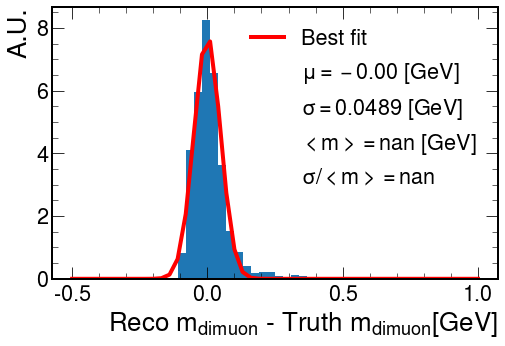

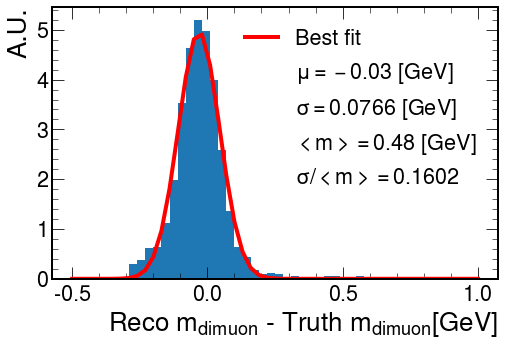

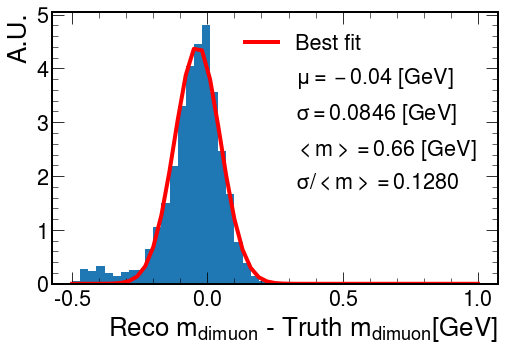

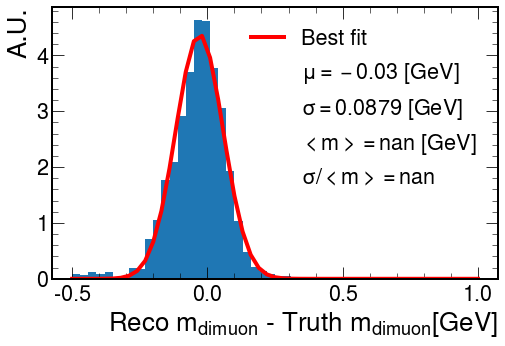

In [8]:
i = 0
for mass in mass_toloop:
    for beam in beam_toloop:
#         plt.figure(figsize=(8,4))
#         plt.hist(detmass_list[i],bins=50,histtype='step');
#         plt.title('mass');plt.show()
#         station = '11'
        data = resmass_list[i]
        mean = np.mean(recmass_list[i])
        print(mean)
#         plot_reduce_norm(data, station)
        gaussian_fit(data, mean)
        i += 1

In [10]:
def getv(beam,mass,strxyz):
    simname = 'data/iron/'+ beam + 'beam' + mass + 'mass_hepmc.root'
    truth = uproot.open(simname)["Events"]
    hits = ak.zip({"detID": truth["hit_detID"].array(),
                   "vtx": truth["truthtrack_x_vtx"].array(),
                   "vty": truth["truthtrack_y_vtx"].array(),
                   "vtz": truth["truthtrack_z_vtx"].array(),
                   "rvtx": truth["track_x_vtx"].array(),
                   "rvty": truth["track_y_vtx"].array(),
                   "rvtz": truth["track_z_vtx"].array(),
                  }, depth_limit=1)
    
    T_z_vtx = []
    R_z_vtx = []
    res_z_vtx = []

    for i in range(len(truth["truthtrack_"+strxyz+"_vtx"].array())):
        if len(truth["track_"+strxyz+"_vtx"].array()[i]) == 1:
            T_z_vtx.append(truth["truthtrack_"+strxyz+"_vtx"].array()[i][0])
            R_z_vtx.append(truth["track_"+strxyz+"_vtx"].array()[i][0])
            res_z_vtx.append(truth["track_"+strxyz+"_vtx"].array()[i][0]-truth["truthtrack_"+strxyz+"_vtx"].array()[i][0])
    return T_z_vtx, R_z_vtx, res_z_vtx


In [44]:
beam = '20'; mass = '0.7'
simname = 'data/iron/'+ beam + 'beam' + mass + 'mass_hepmc.root'
truth = uproot.open(simname)["Events"]
hits = ak.zip({"detID": truth["hit_detID"].array(),
               "vtx": truth["truthtrack_x_vtx"].array(),
               "vty": truth["truthtrack_y_vtx"].array(),
               "vtz": truth["truthtrack_z_vtx"].array(),
               "rvtx": truth["track_x_vtx"].array(),
               "rvty": truth["track_y_vtx"].array(),
               "rvtz": truth["track_z_vtx"].array(),
              }, depth_limit=1)

def gaussian_fit2(resmass, mean,strxyz):
    residual = resmass
    plot_bins = 50
    plot_range = (-5, 5)
    p_guess=[0, 10, 10],
    residual_label = r'Reco $y_{dimuon}$ - Truth $y_{dimuon}[cm]$'
    #Plot and fit
    plt.figure(figsize=(8,5))
    plt.hist(residual,
         bins = plot_bins,
         range = plot_range,
         density = True)
#     plt.show()

    # Gaussian fit
    # Fit directly on the histogram
    def fit_function(x, A, mu, sig):
        return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

    bins = np.linspace(plot_range[0], plot_range[1], plot_bins+1)
    binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

    data_entries, _ = np.histogram(residual, bins=bins,
                                   range = plot_range,
                                   density = True)

    mask = data_entries!=0
    #Fit the function to the histogram data.
    popt, pcov = curve_fit(fit_function,
                           xdata=binscenters[mask],
                           ydata=data_entries[mask],
                           sigma = np.sqrt(data_entries[mask]),
                           absolute_sigma = False,
                           p0=p_guess)

    #Error for parameter estimations
    perr = np.sqrt(np.diag(pcov))
    print("Error for parameter esimations: ", perr)

    std_fit = np.abs(popt[2])
    mean_fit = popt[1]

    print("Standard deviation (fit) is", std_fit)
    print("Mean (fit) is", mean_fit)

    #Plot fitted gaussian
    plt.plot(bins,
             fit_function(bins, *popt),
             "r-",
             linewidth=4,
             label='Best fit')

    plt.plot([],[], 'none', label=r'$\mu=%.2f$ [cm]'%popt[1])
    plt.plot([],[], 'none', label=r'$\sigma=%.4f$ [cm]'%abs(popt[2]))
#     plt.plot([],[], 'none', label=r'$<m>=%.2f$ [cm]'%mean)
#     plt.plot([],[], 'none', label=r'$\sigma/<m>=%.4f$'%(abs(popt[2])/mean))
#     plt.plot([],[], 'none', label=r'$<m>=%.2f$ [GeV]'%mean)
#     plt.plot([],[], 'none', label=r'$\sigma/<m>=%.4f$ [%%]'%(abs(popt[2])/mean))

    #Label the axes
    plt.xlabel(residual_label)
    plt.ylabel('A.U.')
    plt.legend()
    plt.show()

In [23]:
beam_toloop = ["20"]
mass_toloop = ["0.3","0.5","0.7","0.9"]
i = 0
tru_x_vtx_list = []
res_x_vtx_list = []
rec_x_vtx_list = []

tru_y_vtx_list = []
res_y_vtx_list = []
rec_y_vtx_list = []

tru_z_vtx_list = []
res_z_vtx_list = []
rec_z_vtx_list = []
strxyz = "z"
for mass in mass_toloop:
    for beam in beam_toloop:
        T_x_vtx, R_x_vtx, res_x_vtx = getv(beam,mass,"x")
        tru_x_vtx_list.append(T_x_vtx)
        res_x_vtx_list.append(res_x_vtx)
        rec_x_vtx_list.append(R_x_vtx)
        
        T_y_vtx, R_y_vtx, res_y_vtx = getv(beam,mass,"y")
        tru_y_vtx_list.append(T_y_vtx)
        res_y_vtx_list.append(res_y_vtx)
        rec_y_vtx_list.append(R_y_vtx)
        
        T_z_vtx, R_z_vtx, res_z_vtx = getv(beam,mass,"z")
        tru_z_vtx_list.append(T_z_vtx)
        res_z_vtx_list.append(res_z_vtx)
        rec_z_vtx_list.append(R_z_vtx)
        





Error for parameter esimations:  [0.20260199 0.00744195 0.0055638 ]
Standard deviation (fit) is 0.13244012083363266
Mean (fit) is 0.004560197928104091


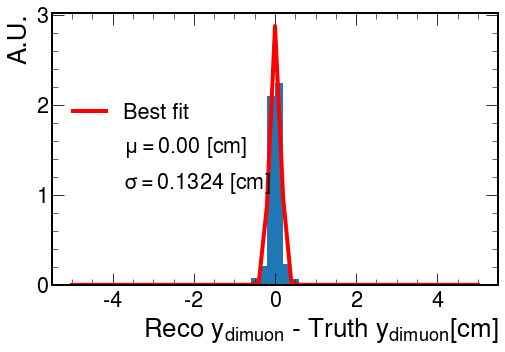

Error for parameter esimations:  [0.21017651 0.01192202 0.00953685]
Standard deviation (fit) is 0.1621052310741684
Mean (fit) is 0.00045897142269106853


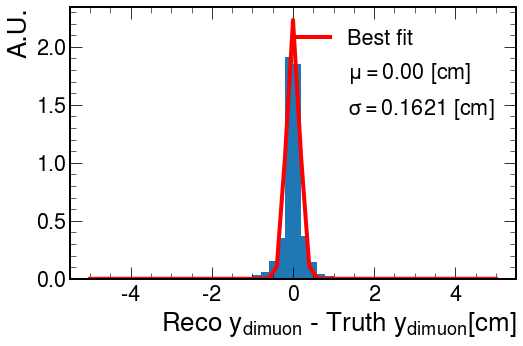

Error for parameter esimations:  [0.23949994 0.01965084 0.01709212]
Standard deviation (fit) is 0.18152070068217988
Mean (fit) is -0.0012209171977324977


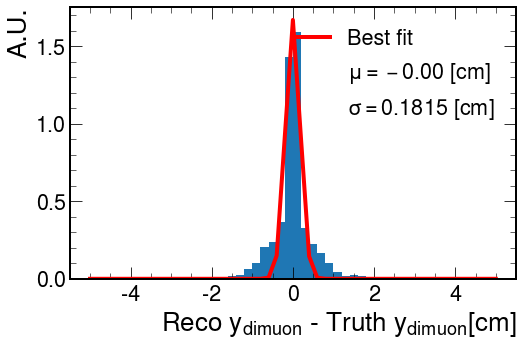

Error for parameter esimations:  [0.05255404 0.10019069 0.08107446]
Standard deviation (fit) is 0.8042091586429677
Mean (fit) is -0.0128404620908758


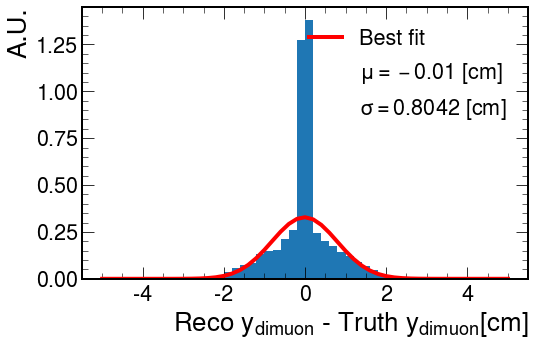

In [45]:
i = 0
for mass in mass_toloop:
    for beam in beam_toloop:
        data = res_y_vtx_list[i]
        mean = np.mean(rec_y_vtx_list[i])
        gaussian_fit2(data, mean,strxyz)
        i += 1

In [27]:
# sim = "data/iron/20beam0.7mass_hepmc.txt.root"
# truth = uproot.open(sim)["Events"]
# hits = ak.zip({"detID": truth["hit_detID"].array(),
#                "x": truth["hit_truthx"].array(),
#                "y": truth["hit_truthy"].array(),
#                "z": truth["hit_truthz"].array(),
#                "px": truth["hit_truthpx"].array(),
#                "py": truth["hit_truthpy"].array(),
#                "pz": truth["hit_truthpz"].array(),
#               }, depth_limit=1)


# len(truth["dimuon_mass"].array()[0])
# Tmass = []
# mass = []
# detmass = []
# for i in range(len(truth["truthdimuon_mass"].array())):
#     if len(truth["dimuon_mass"].array()[i]) == 1:
#         Tmass.append(truth["truthdimuon_mass"].array()[i][0])
#         mass.append(truth["dimuon_mass"].array()[i][0])
#         detmass.append(truth["dimuon_mass"].array()[i][0]-truth["truthdimuon_mass"].array()[i][0])
# plt.figure(figsize=(8,8))
# plt.hist(Tmass,bins=50,histtype='step');
# plt.hist(mass,bins=50,histtype='step');
# plt.hist(detmass,bins=50,histtype='step');
# plt.title('mass');plt.show()


In [4]:
# station = '11'
# data = detmass
# plot_reduce_norm(data, station)

In [31]:
# # pz
# dpzz = truth["dimuon_pz"].array()
# Tdpzz = truth["truthdimuon_pz"].array()
# dpz = []
# Tdpz = []
# for i in range(len(dpzz)):
#     if len(dpzz[i]) != 0 and dpzz [i] < 100000:
#         Tdpz.append(Tdpzz[i][0])
#         dpz.append(dpzz[i][0])
# plt.hist(dpz,bins='auto',histtype='step',label='dpz');
# plt.hist(Tdpz,bins='auto',histtype='step',label='Tdpz');
# plt.legend();plt.title('Tdimuon_pz');plt.show()

# # px
# dpxx = truth["dimuon_px"].array()
# Tdpxx = truth["truthdimuon_px"].array()
# dpx = []
# Tdpx = []
# for i in range(len(dpxx)):
#     if len(dpxx[i]) != 0 and dpxx [i] < 100000:
#         Tdpx.append(Tdpxx[i][0])
#         dpx.append(dpxx[i][0])
# plt.hist(dpx,bins='auto',histtype='step',label='dpx');
# plt.hist(Tdpx,bins='auto',histtype='step',label='Tdpx');
# plt.legend();plt.title('Tdimuon_px');plt.show()

# # py
# dpyy = truth["dimuon_py"].array()
# Tdpyy = truth["truthdimuon_py"].array()
# dpy = []
# Tdpy = []
# for i in range(len(dpzz)):
#     if len(dpyy[i]) != 0 and dpyy [i] < 100000:
#         Tdpy.append(Tdpyy[i][0])
#         dpy.append(dpyy[i][0])
# plt.hist(dpy,bins='auto',histtype='step',label='dpy');
# plt.hist(Tdpy,bins='auto',histtype='step',label='Tdpy');
# plt.legend();plt.title('Tdimuon_py');plt.show()

# dpxysq = []
# Tdpxysq = []
# for i in range(len(dpx)):
#     dpxysq.append(dpx[i]**2 + dpy[i]**2)
# for i in range(len(Tdpx)):
#     Tdpxysq.append(Tdpx[i]**2 + Tdpy[i]**2)
# plt.figure(figsize=(8,8))
# plt.hist(dpxysq,bins='auto',histtype='step',label='dpxy');
# plt.hist(Tdpxysq,bins='auto',histtype='step',label='Tdpxy');
# title ='dpx_sq + ' + 'dpy_sq'
# plt.title(title);plt.legend();plt.show()

In [ ]:
# def calmass2(beam,mass):
#     simname = 'data/iron/'+ beam + 'beam' + mass + 'mass_hepmc.txt.root'
#     truth = uproot.open(simname)["Events"]
#     hits = ak.zip({"detID": truth["hit_detID"].array(),
#                    "x": truth["hit_truthx"].array(),
#                    "y": truth["hit_truthy"].array(),
#                    "z": truth["hit_truthz"].array(),
#                    "px": truth["hit_truthpx"].array(),
#                    "py": truth["hit_truthpy"].array(),
#                    "pz": truth["hit_truthpz"].array(),
#                   }, depth_limit=1)

#     # adding simulated muon 1&2
#     ge00 = ak.to_numpy(truth["ge"].array()[:,0])
#     ge01 = ak.to_numpy(truth["ge"].array()[:,1])

#     gpx00 = ak.to_numpy(truth["gpx"].array()[:,0])
#     gpx01 = ak.to_numpy(truth["gpx"].array()[:,1])

#     gpy00 = ak.to_numpy(truth["gpy"].array()[:,0])
#     gpy01 = ak.to_numpy(truth["gpy"].array()[:,1])

#     gpz00 = ak.to_numpy(truth["gpz"].array()[:,0])
#     gpz01 = ak.to_numpy(truth["gpz"].array()[:,1])


#     gpx=[]
#     gpy=[]
#     gpz=[]
#     ge=[]

#     for i in range(int(len(ge00))):
#         ge.append(ge00[i] + ge01[i])
#         gpx.append(gpx00[i] + gpx01[i])
#         gpy.append(gpy00[i] + gpy01[i])
#         gpz.append(gpz00[i] + gpz01[i])

#     # print('gpx: \n',gpx[0:5],'\ndpx: \n',dpx[0:5])

#     calmass = []
#     vc = 1
#     for i in range(len(ge)):
#         cmass = (ge[i]**2/vc**4 - (gpx[i]**2+gpy[i]**2+gpz[i]**2)/vc**2)
#         calmass.append(np.sqrt(cmass))
#     # print('calmass: \n',calmass)


#     # fit a normdistribution
#     x=calmass
#     hists = {
#         "mass": hist.Hist(
#             hist.axis.StrCategory([], name='mass', growth=True),
#             hist.axis.Regular(50, 0, 1.5, name='cmss', label=r"$v_z \mu$ [GeV]"),
#         ),

#     hists["mass"].fill(
#             mass = mass,
#             cmss = x,
#     )
    
#     to_plot = hists["mass"][{"mass": mass, "cmss":sum}]
#     hep.histplot(to_plot,)